In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import nasdaqdatalink
import statsmodels.api as sm

### Question One

Load in monthly house prices data in pounds sterling (£) from Jan 1991 to Dec 2016 from monthlyHousePricesUK.csv and the FTSE100 index from Yahoo Finance (ticker = ^FTSE) over the same period (01-Jan-1991 to 31-Dec-2016)<br><br>
a) Using the FTSE100 index monthly returns as dependent variable and the house prices monthly<br>
returns as explanatory variable, create a regression model with MATLAB/Python including a constant and calculate the correlation coefficient (5points)

In [172]:
#Load the data from the excel file
monthly_data = pd.read_excel('Monthly.xls')
monthly_prices = monthly_data.rename(columns = {"Unnamed: 0": "Date"})

monthly_prices["Date"] = pd.to_datetime(monthly_prices["Date"])

#Set the date as the index
monthly_prices = monthly_prices.set_index("Date")

#Select the date range
monthly_mask = (monthly_prices.index >= '1991-01-01') & (monthly_prices.index <= '2016-12-31')
monthly_prices_filtered = monthly_prices.loc[monthly_mask]["Average House Price"].sort_index().copy().to_frame()

In [173]:
ftse_data = pd.read_csv('FTSE100.csv')
ftse_data["Date"] = pd.to_datetime(ftse_data["Date"])
ftse_data = ftse_data.set_index('Date')

ftse_mask = (ftse_data.index >= '1991-01-01') & (ftse_data.index <= '2016-12-31')

ftse_data_filtered = ftse_data.loc[ftse_mask]["Close"].sort_index().copy().to_frame()

In [187]:
monthly_prices_filtered["Returns"] = (monthly_prices_filtered["Average House Price"] / monthly_prices_filtered["Average House Price"].shift(1)) - 1
ftse_data_filtered["Returns"] = (ftse_data_filtered["Close"] / ftse_data_filtered["Close"].shift(1)) - 1

In [188]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(monthly_prices_filtered["Returns"].dropna(), ftse_data_filtered["Returns"].dropna())

In [221]:
line_x = np.arange(monthly_prices_filtered["Returns"].min(), monthly_prices_filtered["Returns"].max(), 0.01)
predicted_y = slope * line_x + intercept

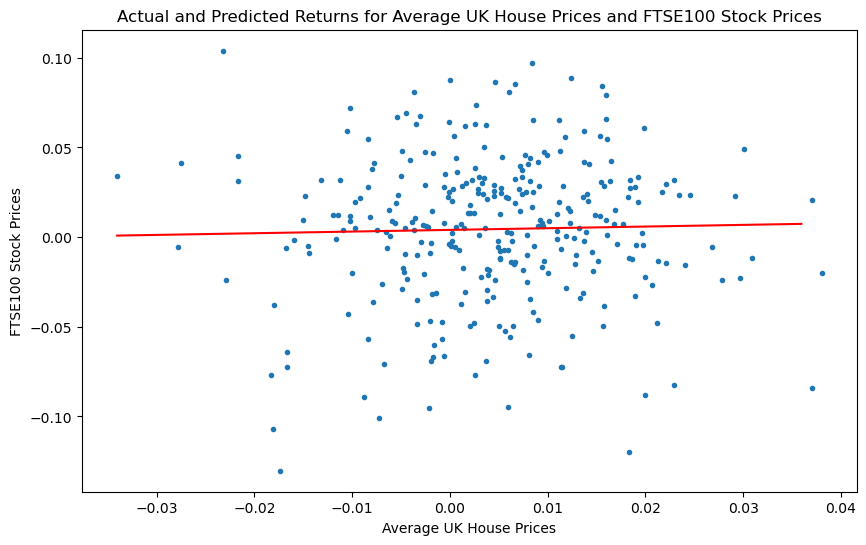

In [224]:
plt.figure(figsize = (10,6))
plt.title("Actual and Predicted Returns for Average UK House Prices and FTSE100 Stock Prices")
plt.xlabel("Average UK House Prices")
plt.ylabel("FTSE100 Stock Prices")
plt.scatter(monthly_prices_filtered["Returns"], ftse_data_filtered["Returns"], marker=".")
plt.plot(line_x, predicted_y, label = "Predictions", color="r")
plt.show()

In [152]:
correlation_coeff = monthly_prices_filtered["Returns"].corr(ftse_data_filtered["Returns"])
correlation_coeff

0.07242801949469753

b) What do the results tell us? (5 points)

The results tell us that there is no correlation between UK monthly house prices and FTSE100 index data. The scatterplot shows no pattern between the two datasets, and the linear regression prediction is nearly a straight line. In addition, the correlation co-effecient 0.07242801949469753 is positive but low, implying there is a weak relationship between the data

c) Use a hypothesis test to back up your conclusion about the existence of a significant relationship between these two variables. (10 points)

**Setting the null and alternative hypotheses:**

H0 (Null Hypothesis): Correlation co-effecient > 0

HA (Alternative Hypothesis): Correlation co-effecient = 0

**Stating the significance level:**

α = 0.05

**Determining the appropriate test type (left-tail, right-tail or two-tailed test)**

A right-tailed test is appropriate because our alternative hypothesis is testing whether the correlation co-effecient is greater than 0. If so, we would infer that there is a relationship between UK monthly house prices and FTSE100 index data.

**Performing the t-test**

In [227]:
# TODO Decide between t-test and f-test

**Conclusion**

The p-value of the data provided is 0.018, which is less than our significance level of 0.05 therefore the null hypothesis is rejected

### Question Two

The college.csv file contains information about different US colleges and universities. We are going to use
the number of applications received, the number of enrolled students, the number of out of state students,
the number of admitted students who were in the top 10% and number of admitted students who were in
the top 25% of their class to predict the graduation rate.<br><br>
a) Calculate the correlation coefficients of the aforementioned variables. (5 points)

In [47]:
college_df = pd.read_csv("College.csv")
college_data = college_df[["Grad.Rate", "Apps", "Enroll", "Top10perc", "Top25perc"]].copy()
college_data.corr()

,Grad.Rate,Apps,Enroll,Top10perc,Top25perc
Grad.Rate,1.000000,0.146755,-0.022341,0.494989,0.477281
Apps,0.146755,1.000000,0.846822,0.338834,0.351640
Enroll,-0.022341,0.846822,1.000000,0.181294,0.226745
Top10perc,0.494989,0.338834,0.181294,1.000000,0.891995
Top25perc,0.477281,0.351640,0.226745,0.891995,1.000000


b) Considering the graduation rate as the dependent variable, use stepwise to build the linear regression model. (5 points)

In [77]:
# Setting the threshold as 0.05
m_threshold_out = 0.05
column_list = list(college_data.columns)
column_list.remove('Grad.Rate')

['Apps', 'Enroll', 'Top10perc', 'Top25perc']

In [78]:
def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [80]:
backward_regression(college_data[column_list], college_data["Grad.Rate"], m_threshold_out, True)

['Apps', 'Enroll', 'Top10perc', 'Top25perc']

c) Which predictor variables are useful in predicting the graduation rate? Explain how you got those variables. (5 points)

d) Would the set of predictor variables be useful in predicting the graduation rate if you were to use BIC to select the model? Why? (5 points)

e) Compare the accuracy of the model using only useful predictors with the accuracy of the model using all five predictors? (5 points)

f) Given a set of predictors corresponding to Carnegie Mellon University, what graduation rate value should the most accurate model predict? (5 points)

### Question Three

Design and undertake a study to assess a trend in the domain of transport for one or more countries of your choice. Your study should be based on publicly available data and explained using mathematical facts. Explain assumptions, methodology and findings. An example would be to study the relationship between increase in transport and road traffic accidents. The World Health Organization has data for road traffic deaths per country in 2010 and there is a World Bank indicator for Passenger cars (per 1000 people). Can you predict the situation in 2021?<br><br>
Deliverables: You should turn in a report that includes the trend you are studying, the data source (5 points), your assumptions (5points), the methodology used along with its implementation in MATLAB/Python (10 points), and finally the findings and conclusions, which should be backed with code and figures (10 points).

### Question Four

The bank of Israel has published the data for unemployment rate (per 100 Israeli workforces) from 1980-12-31 to 2013-09-02. Download the data from Quandl (code: ODA/ISR_LUR) into MATLAB/Python. Estimate the likely rate of unemployment by the year 2020 (10 points). Explain how one can evaluate the accuracy of the estimate (5 points) and provide the accuracy as a percentage. (5
points)

In [165]:
oda_data = nasdaqdatalink.get("ODA/ISR_LUR")

In [ ]:
oda_data